In [1]:
# Connect to Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unrar x "/content/drive/MyDrive/Crypro_21.rar" "content/"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/Crypro_21.rar


Would you like to replace the existing file content/data_TSTUSDT.pkl
16471098 bytes, modified on 2025-06-16 16:29
with a new one
16471098 bytes, modified on 2025-06-16 16:29

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 
User break

User break


Loading Embeded news based on Finbert

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
data_news_path = '../../../dataset/Crypto_1min/'
df_news = pd.read_pickle('/content/drive/MyDrive/news_20crypto_embed_finbert.pickle')

Embedding No News sentence for using in timestamp with no news

In [4]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load FinBERT model and tokenizer
model_name = "yiyanghkust/finbert-tone"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Your input news text
text = "No news."

# Tokenize and encode the text
inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)

# Get the model output
with torch.no_grad():
    outputs = model(**inputs)

# Use the [CLS] token embedding as sentence embedding
cls_embedding = outputs.last_hidden_state[:, 0, :]  # Shape: [1, 768]

# Convert to numpy array if needed
embedding_vector = cls_embedding.squeeze().numpy()

print("Embedding shape:", embedding_vector.shape)
# print("Embedding vector:", embedding_vector)
no_news_vector = list(embedding_vector)

Embedding shape: (768,)


Loading OHLCV of multi stocks

In [5]:
import os
data_crypto_path = '/content/content/'
list_crypto = [x[5:-4] for x in os.listdir(data_crypto_path) if 'data_' in x and 'FORMUSDT' not in x]
# list_crypto = list_crypto[4:10]

In [6]:
len(list_crypto)

20

In [7]:
list_crypto = ['BTCUSDT', 'ETHUSDT', 'XRPUSDT', 'TRXUSDT', 'SEIUSDT',
 'HBARUSDT', 'XLMUSDT', 'TIAUSDT', 'ARKUSDT', 'JSTUSDT']

In [8]:
list_data = []
shifted_window = 30
selected_f_asset = ['open', 'high', 'low', 'close', 'volume',
    'quoteAssetVolume', 'numberOfTrades', 'takerBuyBaseVol',
       'takerBuyQuoteVol']
selected_f_asset = ['close', 'volume', 'numberOfTrades', 'prev_return', 'prev_volatility', 'return', 'volatility']
selected_f_all = []
list_target = []

for symb in list_crypto:
  df = pd.read_pickle(data_crypto_path+'data_{}.pkl'.format(symb))
  print(symb, len(df))
  df['return'] = 100*((df['close'].shift(-1)/df['close'])-1)
  df['prev_return'] = 100*((df['close']/df['close'].shift(shifted_window))-1)
  df['volatility'] = 100*df['close'].rolling(30).std().shift(-30)
  df['prev_volatility'] = 100*df['close'].rolling(30).std()
  df = df[selected_f_asset].rename(columns={x:symb+'_'+x for x in selected_f_asset})
  selected_f_all.extend(list(df.columns))

  df[symb+'_return'] = df[symb+'_'+'return']
  df[symb+'_volatility'] = df[symb+'_'+'volatility']
  list_target.append(symb+'_return')
  list_target.append(symb+'_volatility')
  list_data.append(df.copy())

BTCUSDT 131041
ETHUSDT 131041
XRPUSDT 131041
TRXUSDT 131041
SEIUSDT 131041
HBARUSDT 131041
XLMUSDT 131041
TIAUSDT 131041
ARKUSDT 131041
JSTUSDT 131041


In [9]:
len(selected_f_all)

70

In [10]:
data = pd.concat(list_data,axis=1)
df = pd.read_pickle(data_crypto_path+'data_{}.pkl'.format('BTCUSDT'))
df['return'] = df['close'].pct_change()
data['dateTime'] = df['dateTime']
data['time'] = data['dateTime'].astype(str).copy()
data['return'] = df['close'].pct_change()
data

,BTCUSDT_close,BTCUSDT_volume,BTCUSDT_numberOfTrades,BTCUSDT_prev_return,BTCUSDT_prev_volatility,BTCUSDT_return,BTCUSDT_volatility,ETHUSDT_close,ETHUSDT_volume,ETHUSDT_numberOfTrades,...,JSTUSDT_close,JSTUSDT_volume,JSTUSDT_numberOfTrades,JSTUSDT_prev_return,JSTUSDT_prev_volatility,JSTUSDT_return,JSTUSDT_volatility,dateTime,time,return
0,91785.18,44.25582000,9784,NaN,NaN,0.057275,30532.801818,2522.98,1236.00450000,7010,...,0.03331,18269.00000000,13,NaN,NaN,0.030021,0.008186,2025-02-25 00:00:00,2025-02-25 00:00:00,NaN
1,91837.75,29.64367000,7048,NaN,NaN,0.134171,30363.719702,2525.15,609.72690000,4877,...,0.03332,2854.40000000,4,NaN,NaN,0.000000,0.007935,2025-02-25 00:01:00,2025-02-25 00:01:00,0.000573
2,91960.97,70.22032000,6386,NaN,NaN,-0.106784,29798.433752,2529.97,672.80150000,3844,...,0.03332,89531.30000000,8,NaN,NaN,0.030012,0.007655,2025-02-25 00:02:00,2025-02-25 00:02:00,0.001342
3,91862.77,50.83532000,4539,NaN,NaN,-0.209748,29594.091863,2525.85,595.41120000,3903,...,0.03333,328.80000000,1,NaN,NaN,-0.120012,0.007285,2025-02-25 00:03:00,2025-02-25 00:03:00,-0.001068
4,91670.09,62.93148000,11779,NaN,NaN,0.141704,29585.077527,2516.18,1280.56490000,9605,...,0.03329,18030.80000000,13,NaN,NaN,0.030039,0.007097,2025-02-25 00:04:00,2025-02-25 00:04:00,-0.002097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131036,109394.14,1.80238000,514,0.142651,7155.315753,0.013666,NaN,2562.98,50.44800000,421,...,0.03559,1595.40000000,2,0.140687,0.002047,0.000000,NaN,2025-05-26 23:56:00,2025-05-26 23:56:00,-0.000065
131037,109409.09,5.64688000,698,0.180025,6913.379611,0.007742,NaN,2563.49,77.09600000,508,...,0.03559,836.40000000,2,0.168871,0.001946,-0.028098,NaN,2025-05-26 23:57:00,2025-05-26 23:57:00,0.000137
131038,109417.56,0.52540000,224,0.187661,6626.350282,0.015747,NaN,2563.20,60.38830000,171,...,0.03558,1531.20000000,1,0.112549,0.001864,0.028106,NaN,2025-05-26 23:58:00,2025-05-26 23:58:00,0.000077
131039,109434.79,3.88664000,1349,0.197704,6365.351309,-0.038626,NaN,2563.70,99.02600000,711,...,0.03559,7002.90000000,5,0.168871,0.001714,-0.028098,NaN,2025-05-26 23:59:00,2025-05-26 23:59:00,0.000157


Preparing embedding of news (Handling multi news and no news)

In [11]:
data['day'] = data['dateTime'].apply(lambda x:str(x)[:10])
data[data['day']>='2025-05-10'].shape[0]/data.shape[0]

0.18681939240390413

In [12]:
import numpy as np
df_news['embedding'] = df_news['embedding'].apply(lambda x: np.array(x))

df_grouped = df_news[['time', 'embedding', 'count']].groupby('time')['embedding'].apply(
    lambda x: np.mean(np.stack(x.values), axis=0)
).reset_index()
data_all = data.merge(df_grouped, on='time', how='left')
data_all['embedding'] = data_all['embedding'].apply(
    lambda x: no_news_vector if x is np.nan or x is None else x
)

In [13]:
list_crypto_first = [x[:-4] for x in list_crypto]
list_crypto_first

['BTC', 'ETH', 'XRP', 'TRX', 'SEI', 'HBAR', 'XLM', 'TIA', 'ARK', 'JST']

In [14]:
data_all = data_all[data_all['time']>=df_news['time'].min()][data_all['time']<=df_news['time'].max()]

Showing Data

In [15]:
data_all[selected_f_all]

,BTCUSDT_close,BTCUSDT_volume,BTCUSDT_numberOfTrades,BTCUSDT_prev_return,BTCUSDT_prev_volatility,BTCUSDT_return,BTCUSDT_volatility,ETHUSDT_close,ETHUSDT_volume,ETHUSDT_numberOfTrades,...,ARKUSDT_prev_volatility,ARKUSDT_return,ARKUSDT_volatility,JSTUSDT_close,JSTUSDT_volume,JSTUSDT_numberOfTrades,JSTUSDT_prev_return,JSTUSDT_prev_volatility,JSTUSDT_return,JSTUSDT_volatility
0,91785.18,44.25582000,9784,NaN,NaN,0.057275,30532.801818,2522.98,1236.00450000,7010,...,NaN,0.164628,0.395882,0.03331,18269.00000000,13,NaN,NaN,0.030021,0.008186
1,91837.75,29.64367000,7048,NaN,NaN,0.134171,30363.719702,2525.15,609.72690000,4877,...,NaN,0.117398,0.394875,0.03332,2854.40000000,4,NaN,NaN,0.000000,0.007935
2,91960.97,70.22032000,6386,NaN,NaN,-0.106784,29798.433752,2529.97,672.80150000,3844,...,NaN,-0.070356,0.391564,0.03332,89531.30000000,8,NaN,NaN,0.030012,0.007655
3,91862.77,50.83532000,4539,NaN,NaN,-0.209748,29594.091863,2525.85,595.41120000,3903,...,NaN,-0.328561,0.388680,0.03333,328.80000000,1,NaN,NaN,-0.120012,0.007285
4,91670.09,62.93148000,11779,NaN,NaN,0.141704,29585.077527,2516.18,1280.56490000,9605,...,NaN,-0.070638,0.388194,0.03329,18030.80000000,13,NaN,NaN,0.030039,0.007097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129596,109030.02,21.06713000,3921,0.258126,11548.993178,-0.005164,3644.397554,2552.77,225.37620000,1890,...,0.046639,0.000000,0.142062,0.03616,738.40000000,2,0.388673,0.006327,0.000000,0.003212
129597,109024.39,5.10152000,1789,0.273262,12009.730552,-0.026086,5426.627618,2551.81,1078.91390000,2178,...,0.045151,0.000000,0.148774,0.03616,1093.20000000,3,0.416551,0.006199,0.027655,0.003812
129598,108995.95,7.48873000,769,0.367793,11563.053932,0.007560,6267.356571,2550.74,90.29550000,1032,...,0.040678,0.122519,0.150848,0.03617,1733.20000000,2,0.472222,0.005998,0.027647,0.004163
129599,109004.19,6.56241000,1298,0.332862,11303.698905,-0.043980,6550.656289,2551.22,90.74810000,584,...,0.039335,-0.220264,0.148169,0.03618,33108.70000000,15,0.500000,0.005770,-0.055279,0.004326


Normalizing Data Z-Score

In [16]:
##Normalization

for x in selected_f_all:
  data_all[x] = data_all[x].fillna(0)
  data_all[x] = data_all[x].astype(float)
  data_all[x] = (data_all[x]-data_all[x].mean())/(data_all[x].std())

Create time index for TimseNet

In [17]:
import warnings
warnings.filterwarnings('ignore')
from torch.utils.data import Dataset, DataLoader

df_stamp = data_all[['time']].rename(columns={'time':'dateTime'})
df_stamp['dateTime'] = pd.to_datetime(df_stamp['dateTime'])
df_stamp['month'] = df_stamp.dateTime.apply(lambda row: row.month, 1)
df_stamp['day'] = df_stamp.dateTime.apply(lambda row: row.day, 1)
df_stamp['weekday'] = df_stamp.dateTime.apply(lambda row: row.weekday(), 1)
df_stamp['hour'] = df_stamp.dateTime.apply(lambda row: row.hour, 1)
df_stamp['minute'] = df_stamp.dateTime.apply(lambda row: row.minute, 1)
data_stamp = df_stamp.drop(['dateTime'], axis=1)

Dataset Class and Creating DataLoader

In [18]:
selected_f_all = [x for x in selected_f_all if (('return' not in x) or ('prev_return' in x))]
selected_f_all = [x for x in selected_f_all if (('volatility' not in x) or ('prev_volatility' in x))]
selected_f_all

['BTCUSDT_close',
 'BTCUSDT_volume',
 'BTCUSDT_numberOfTrades',
 'BTCUSDT_prev_return',
 'BTCUSDT_prev_volatility',
 'ETHUSDT_close',
 'ETHUSDT_volume',
 'ETHUSDT_numberOfTrades',
 'ETHUSDT_prev_return',
 'ETHUSDT_prev_volatility',
 'XRPUSDT_close',
 'XRPUSDT_volume',
 'XRPUSDT_numberOfTrades',
 'XRPUSDT_prev_return',
 'XRPUSDT_prev_volatility',
 'TRXUSDT_close',
 'TRXUSDT_volume',
 'TRXUSDT_numberOfTrades',
 'TRXUSDT_prev_return',
 'TRXUSDT_prev_volatility',
 'SEIUSDT_close',
 'SEIUSDT_volume',
 'SEIUSDT_numberOfTrades',
 'SEIUSDT_prev_return',
 'SEIUSDT_prev_volatility',
 'HBARUSDT_close',
 'HBARUSDT_volume',
 'HBARUSDT_numberOfTrades',
 'HBARUSDT_prev_return',
 'HBARUSDT_prev_volatility',
 'XLMUSDT_close',
 'XLMUSDT_volume',
 'XLMUSDT_numberOfTrades',
 'XLMUSDT_prev_return',
 'XLMUSDT_prev_volatility',
 'TIAUSDT_close',
 'TIAUSDT_volume',
 'TIAUSDT_numberOfTrades',
 'TIAUSDT_prev_return',
 'TIAUSDT_prev_volatility',
 'ARKUSDT_close',
 'ARKUSDT_volume',
 'ARKUSDT_numberOfTrades',
 'A

In [19]:
data_all['time_int'] = data_all['dateTime'].apply(lambda x:str(x).replace('-','').replace(' ','').replace(':','')).astype(int)

In [20]:
import torch
from torch.utils.data import Dataset
import numpy as np
from torch.utils.data import Dataset, DataLoader

class NewsTimeSeriesDataset(Dataset):
    def __init__(self, df, data_stamp, selected_f_all, stock_list, seq_len=30):
        self.df = df.reset_index(drop=True)
        self.data_stamp = data_stamp.reset_index(drop=True)
        self.features = selected_f_all
        self.seq_len = seq_len
        self.stock_list = [x+'_return' for x in stock_list]

    def __len__(self):
        return len(self.df) - self.seq_len-shifted_window

    def __getitem__(self, idx):
        ts_window = self.df.loc[idx:idx + self.seq_len - 1, self.features].values.astype('float32')
        # x_mask = self.data_stamp.loc[idx:idx + self.seq_len - 1].values.astype('float32')
        news_window = self.df.loc[idx:idx + self.seq_len - 1, 'embedding'].values
        news_window = np.stack(news_window).astype('float32')
        target      = self.df.loc[idx + self.seq_len:idx + self.seq_len+shifted_window-1, self.stock_list].values.astype('float32')  # shape: [19]
        time        = self.df.loc[idx:idx + self.seq_len - 1, 'time_int'].values[-1]
        return {
            'timeseries': torch.tensor(ts_window),     # [30, 114]
            'news': torch.tensor(news_window),         # [30, 768]
            'target': torch.tensor(target),
            'time':torch.tensor(time)
            # 'time_mask':torch.tensor(x_mask)# [19]
        }


split = int(0.8 * len(data_all))

data_train = data_all[data_all['day']<'2025-05-10'].copy()
data_test = data_all[data_all['day']>='2025-05-10'].copy()
train_dataset = NewsTimeSeriesDataset(data_train, data_stamp.iloc[:split], selected_f_all, list_crypto, seq_len=30)
val_dataset = NewsTimeSeriesDataset(data_test, data_stamp.iloc[split:], selected_f_all, list_crypto, seq_len=30)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)


Loss Function for M of N

In [21]:
def func_loss(output, target, top_k=5):
    """
    output: [B, N] - raw weights predicted for each stock
    target: [B, T, N] - actual return sequences for each stock over T time steps
    """

    # Step 1: Select top-k absolute weights
    abs_output = torch.abs(output)
    topk_vals, topk_indices = torch.topk(abs_output, top_k, dim=1)

    # Gather top-k weights and corresponding returns
    batch_size = output.shape[0]
    weights_topk = torch.gather(output, 1, topk_indices)  # [B, top_k]

    # Normalize selected weights (long/short portfolio)
    weights_topk = torch.tanh(weights_topk)  # optional activation
    weights_topk = weights_topk / (torch.sum(torch.abs(weights_topk), dim=1, keepdim=True) + 1e-8)  # [B, top_k]

    # Gather corresponding returns: [B, T, top_k]
    target_topk = torch.gather(target, 2, topk_indices.unsqueeze(1).expand(-1, target.shape[1], -1))

    # Step 2: Compute portfolio return sequence
    weights_exp = weights_topk.unsqueeze(1)  # [B, 1, top_k]
    portfolio_returns = torch.sum(weights_exp * target_topk, dim=2)  # [B, T]

    # Step 3: Sharpe ratio
    mean_r = torch.mean(portfolio_returns, dim=1)
    std_r = torch.std(portfolio_returns, dim=1) + 1e-6
    sharpe = mean_r / std_r
    loss_sharpe = -torch.mean(sharpe)

    # Step 4: Optional regularization (to avoid very sparse attention)
    loss_diversify = torch.mean(weights_topk ** 2)

    # Step 5: Total loss
    λ_div = 0.01
    loss = loss_sharpe + λ_div * loss_diversify

    return loss


Model Architecture

In [22]:
import math
import torch.nn as nn
import torch

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=500):
        super().__init__()
        pe = torch.zeros(max_len, d_model)  # [max_len, d_model]
        position = torch.arange(0, max_len, dtype=torch.float32).unsqueeze(1)  # [max_len, 1]
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))  # [d_model/2]

        pe[:, 0::2] = torch.sin(position * div_term)  # even dims
        pe[:, 1::2] = torch.cos(position * div_term)  # odd dims
        pe = pe.unsqueeze(0)  # [1, max_len, d_model]
        self.register_buffer('pe', pe)

    def forward(self, x):
        # x: [batch_size, seq_len, d_model]
        x = x + self.pe[:, :x.size(1), :]
        return x

class TransformerReturnPredictor(nn.Module):
    def __init__(self, feature_dim, d_model=64, nhead=4, num_layers=2, max_len=500):
        super().__init__()
        self.input_proj = nn.Linear(feature_dim, d_model)
        self.pos_encoder = PositionalEncoding(d_model, max_len=max_len)

        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.output_layer = nn.Linear(d_model, 1)

    def forward(self, x):
        # x: [batch_size, seq_len, feature_dim]
        x = self.input_proj(x)             # [batch_size, seq_len, d_model]
        x = self.pos_encoder(x)            # Add positional encoding
        x = self.transformer(x)            # [batch_size, seq_len, d_model]
        x = x[:, -1, :]                    # Use representation of last time step
        return self.output_layer(x).squeeze(-1)


In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.fft
from transformers import AutoTokenizer, AutoModel
finbert_model_name = "yiyanghkust/finbert-tone"
import torch.nn as nn

class MarketNewsFusionModel(nn.Module):
    def __init__(self, ts_input_dim, news_embed_dim, hidden_dim=64, num_stocks=19,
                 max_len=30, d_model=64, nhead=4, num_layers=2):
        super().__init__()
        self.num_stocks = num_stocks

        self.d_model = d_model
        self.input_proj = nn.Linear(ts_input_dim, self.d_model)
        self.pos_encoder = PositionalEncoding(self.d_model, max_len=max_len)
        encoder_layer = nn.TransformerEncoderLayer(d_model=self.d_model, nhead=nhead, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.ts_out = nn.Linear(128, hidden_dim)

        # 2. News LSTM
        self.news_proj = nn.Linear(news_embed_dim, 64)
        self.news_lstm = nn.LSTM(input_size=64, hidden_size=hidden_dim, batch_first=True)

        # 3. Stock-specific regression heads (1 per stock)
        self.stock_heads = nn.Sequential(
                nn.Linear(self.d_model+hidden_dim, 64),
                nn.ReLU(),
                nn.Linear(64, num_stocks)
            )

    def forward(self, ts_input, x_mark_enc, news_input):  # [B, 30, F], [B, 30, E]

                # Transformer on OHLCV
        x = self.input_proj(ts_input)           # [B, T, d_model]
        x = self.pos_encoder(x)
        x = self.transformer(x)                  # [B, T, d_model]
        ts_emb = x[:, -1, :].squeeze(1)                   # [B, d_model]


        news_proj = self.news_proj(news_input)         # [B, 30, 64]
        _, (hn, _) = self.news_lstm(news_proj)        # hn: [1, B, 64]
        news_emb = hn[-1]                              # [B, 64]

        fused = torch.cat([ts_emb, news_emb], dim=1)   # [B, 128]

        outputs = self.stock_heads(fused).squeeze(-1)
        return outputs             # [B, 19]


seq_len = 30

# model = TimesNet.Model(args).float()
# model = Model_TimesNet(configs).float()

In [24]:
data_all = data_all.fillna(0)

Loading Model and dataloader

In [25]:
from torch.utils.data import DataLoader

# Example setup
# selected_f_all = list of feature columns (e.g., 6 × 19 = 114)
# stock_list = ['AAPL', 'GOOG', ..., 'TSLA'] → 19 stock target columns
# df = your dataframe with those columns and 'embedding' column


split = int(0.8 * len(data_all))

# train_dataset = NewsTimeSeriesDataset(data_all.iloc[:split], data_stamp.iloc[:split], selected_f_all, list_crypto, seq_len=30)
# val_dataset = NewsTimeSeriesDataset(data_all.iloc[split:], data_stamp.iloc[split:], selected_f_all, list_crypto, seq_len=30)

# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=32)
data_train = data_all[data_all['day']<'2025-05-10'].copy()
data_test = data_all[data_all['day']>='2025-05-10'].copy()
train_dataset = NewsTimeSeriesDataset(data_train, data_stamp.iloc[:split], selected_f_all, list_crypto, seq_len=30)
val_dataset = NewsTimeSeriesDataset(data_test, data_stamp.iloc[split:], selected_f_all, list_crypto, seq_len=30)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)


model = MarketNewsFusionModel(ts_input_dim=len(selected_f_all),
 news_embed_dim=len(data_all['embedding'].iloc[0]),
 hidden_dim=64,
 num_stocks=len(list_crypto),
 max_len=30,
 d_model=64, nhead=4, num_layers=2).cuda()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_fn = nn.MSELoss()



Testing model pipeline

In [26]:
# One training step
for batch in val_loader:
    ts_input = batch['timeseries'].cuda()
    news_input = batch['news'].cuda()
    target = batch['target'].cuda()
    # time_mask = batch['time_mask'].cuda()
    time_mask = 1
    output = model(ts_input, time_mask, news_input)  # [B, 19]
    loss = func_loss(output, target)
    break

Validation function and Potfolio Creator

In [167]:
import matplotlib.pyplot as plt

def func_validation(output, target, top_k=5):# Step 1: Normalize weights
  """
  output: [B, N] - raw weights predicted for each stock
  target: [B, T, N] - actual return sequences for each stock over T time steps
  """

  # Step 1: Select top-k absolute weights
  abs_output = torch.abs(output)
  topk_vals, topk_indices = torch.topk(abs_output, top_k, dim=1)

  # Gather top-k weights and corresponding returns
  batch_size = output.shape[0]
  weights_topk = torch.gather(output, 1, topk_indices)  # [B, top_k]

  # Normalize selected weights (long/short portfolio)
  weights_topk = torch.tanh(weights_topk)  # optional activation
  weights_topk = weights_topk / (torch.sum(torch.abs(weights_topk), dim=1, keepdim=True) + 1e-8)  # [B, top_k]

  # Gather corresponding returns: [B, T, top_k]
  target_topk = torch.gather(target, 2, topk_indices.unsqueeze(1).expand(-1, target.shape[1], -1))

  # Step 2: Compute portfolio return sequence
  weights_exp = weights_topk.unsqueeze(1)  # [B, 1, top_k]
  portfolio_returns = torch.sum(weights_exp * target_topk, dim=2)  # [B, T]

  # Step 3: Sharpe ratio
  mean_r = torch.mean(portfolio_returns, dim=1)
  std_r = torch.std(portfolio_returns, dim=1) + 1e-6
  sharpe = mean_r / std_r
  return mean_r, sharpe


def func_generate_portfolio(all_preds, all_topk_vals):

  only_top_k = True
  # len(self.df) - self.seq_len-shifted_window
  predicted_array = np.vstack(all_preds)
  lowest_value = np.vstack(all_topk_vals)
  df_weight_pred = data_test[30:-shifted_window][['dateTime']+[x+'_return' for x in list_crypto]].copy()
  df_weight_pred ['lowest_value'] = lowest_value[:,-1]
  df_return = data_test[30:-shifted_window][['dateTime']+[x+'_return' for x in list_crypto]].copy()
  list_weight = []
  for i in range(len(list_crypto)):
    df_weight_pred[list_crypto[i]+'_weight'] = predicted_array[:,i]
    list_weight.append(list_crypto[i]+'_weight')

  if(only_top_k):
    for x in list_weight:
      df_weight_pred.loc[abs(df_weight_pred[x])<df_weight_pred['lowest_value'], x] = 0

  sum_weight = abs(df_weight_pred[list_weight]).sum(axis=1).copy()
  for x in list_weight:
    df_weight_pred[x] = df_weight_pred[x]/sum_weight

  df_weight_pred.to_pickle('/content/drive/MyDrive/Portfolio/10of20stock_df_weight_pred_epoch{}.pickle'.format(str(epoch)))

  df_weight_30 = df_weight_pred[['dateTime']+list(df_weight_pred.columns[-len(list_weight):])].iloc[::30].reset_index().drop('index',axis=1)
  df_portfolio = df_return.merge(df_weight_30, on='dateTime', how='left')
  df_portfolio = df_portfolio.fillna(method='ffill')
  list_portfolio = []
  for x in list_crypto:
    df_portfolio[x+'_value'] = df_portfolio[x+'_weight']*df_portfolio[x+'_return']
    list_portfolio.append(x+'_value')
  df_portfolio['portfolio'] = df_portfolio[list_portfolio].cumsum().sum(axis=1)
  df_portfolio.to_pickle('/content/drive/MyDrive/Portfolio/10of20stock_df_portfolio_epoch{}.pickle'.format(str(epoch)))

  # Example: Plot df['y'] vs df['x']
  plt.figure(figsize=(10, 5))  # Optional: adjust figure size

  plt.plot(df_portfolio['dateTime'], df_portfolio['portfolio'])  # You can remove `marker` if not needed

  # Add grid
  plt.grid(True)

  # Rotate x-axis labels
  plt.xticks(rotation=45)

  # Optional: Add labels and title
  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')
  plt.title('portfolio cum return')

  plt.tight_layout()  # Adjust layout to prevent clipping of labels
  plt.savefig('/content/drive/MyDrive/Portfolio/10of20stock_df_portfolio_epoch{}.png'.format(str(epoch)), dpi=300)  # or .jpg, .svg, .pdf

  plt.show()


Training model

In [173]:
# One training step
for batch in val_loader:
    ts_input = batch['timeseries'].cuda()
    news_input = batch['news'].cuda()
    target = batch['target'].cuda()
    # time_mask = batch['time_mask'].cuda()
    time_mask = 1
    output = model(ts_input, time_mask, news_input)  # [B, 19]
    loss = func_loss(output, target, top_k=10)
    mean_r, sharp = func_validation(output, target, top_k=10)
    break



🔁 Epoch 1/50


Training:   0%|          | 1/3329 [00:00<36:56,  1.50it/s]

  Step 0/3329 - Batch Loss: 0.0124 - Avg Loss: 0.0124


Training:   3%|▎         | 101/3329 [00:50<26:26,  2.03it/s]

  Step 100/3329 - Batch Loss: 0.0386 - Avg Loss: -0.0071


Training:   6%|▌         | 201/3329 [01:39<26:00,  2.00it/s]

  Step 200/3329 - Batch Loss: 0.0048 - Avg Loss: -0.0101


Training:   9%|▉         | 301/3329 [02:30<25:58,  1.94it/s]

  Step 300/3329 - Batch Loss: -0.0230 - Avg Loss: -0.0136


Training:  12%|█▏        | 401/3329 [03:21<24:09,  2.02it/s]

  Step 400/3329 - Batch Loss: -0.0408 - Avg Loss: -0.0139


Training:  15%|█▌        | 501/3329 [04:12<24:13,  1.95it/s]

  Step 500/3329 - Batch Loss: -0.0602 - Avg Loss: -0.0159


Training:  18%|█▊        | 601/3329 [05:04<23:49,  1.91it/s]

  Step 600/3329 - Batch Loss: -0.0388 - Avg Loss: -0.0166


Training:  21%|██        | 701/3329 [05:54<21:37,  2.03it/s]

  Step 700/3329 - Batch Loss: 0.0380 - Avg Loss: -0.0169


Training:  24%|██▍       | 801/3329 [06:42<20:40,  2.04it/s]

  Step 800/3329 - Batch Loss: -0.0252 - Avg Loss: -0.0184


Training:  27%|██▋       | 901/3329 [07:32<20:20,  1.99it/s]

  Step 900/3329 - Batch Loss: -0.0377 - Avg Loss: -0.0195


Training:  30%|███       | 1001/3329 [08:22<19:25,  2.00it/s]

  Step 1000/3329 - Batch Loss: -0.0019 - Avg Loss: -0.0211


Training:  33%|███▎      | 1101/3329 [09:11<18:48,  1.97it/s]

  Step 1100/3329 - Batch Loss: -0.0677 - Avg Loss: -0.0223


Training:  36%|███▌      | 1201/3329 [10:00<17:49,  1.99it/s]

  Step 1200/3329 - Batch Loss: -0.0586 - Avg Loss: -0.0233


Training:  39%|███▉      | 1301/3329 [10:50<17:10,  1.97it/s]

  Step 1300/3329 - Batch Loss: -0.0753 - Avg Loss: -0.0242


Training:  42%|████▏     | 1401/3329 [11:42<16:41,  1.92it/s]

  Step 1400/3329 - Batch Loss: -0.0470 - Avg Loss: -0.0252


Training:  45%|████▌     | 1501/3329 [12:33<15:42,  1.94it/s]

  Step 1500/3329 - Batch Loss: -0.0495 - Avg Loss: -0.0264


Training:  48%|████▊     | 1601/3329 [13:25<14:31,  1.98it/s]

  Step 1600/3329 - Batch Loss: -0.0526 - Avg Loss: -0.0278


Training:  51%|█████     | 1701/3329 [14:16<13:41,  1.98it/s]

  Step 1700/3329 - Batch Loss: -0.0900 - Avg Loss: -0.0286


Training:  54%|█████▍    | 1801/3329 [15:07<13:04,  1.95it/s]

  Step 1800/3329 - Batch Loss: -0.0628 - Avg Loss: -0.0298


Training:  57%|█████▋    | 1901/3329 [15:58<12:11,  1.95it/s]

  Step 1900/3329 - Batch Loss: -0.0943 - Avg Loss: -0.0308


Training:  60%|██████    | 2001/3329 [16:49<11:22,  1.95it/s]

  Step 2000/3329 - Batch Loss: -0.0782 - Avg Loss: -0.0321


Training:  63%|██████▎   | 2101/3329 [17:40<10:34,  1.94it/s]

  Step 2100/3329 - Batch Loss: -0.0696 - Avg Loss: -0.0333


Training:  66%|██████▌   | 2201/3329 [18:32<09:26,  1.99it/s]

  Step 2200/3329 - Batch Loss: -0.0352 - Avg Loss: -0.0344


Training:  69%|██████▉   | 2301/3329 [19:24<08:50,  1.94it/s]

  Step 2300/3329 - Batch Loss: -0.0337 - Avg Loss: -0.0355


Training:  72%|███████▏  | 2401/3329 [20:15<07:51,  1.97it/s]

  Step 2400/3329 - Batch Loss: -0.0643 - Avg Loss: -0.0366


Training:  75%|███████▌  | 2501/3329 [21:06<07:13,  1.91it/s]

  Step 2500/3329 - Batch Loss: -0.0704 - Avg Loss: -0.0376


Training:  78%|███████▊  | 2601/3329 [21:56<06:07,  1.98it/s]

  Step 2600/3329 - Batch Loss: -0.0665 - Avg Loss: -0.0385


Training:  81%|████████  | 2701/3329 [22:47<05:14,  1.99it/s]

  Step 2700/3329 - Batch Loss: -0.0496 - Avg Loss: -0.0393


Training:  84%|████████▍ | 2801/3329 [23:37<04:22,  2.02it/s]

  Step 2800/3329 - Batch Loss: -0.0757 - Avg Loss: -0.0402


Training:  87%|████████▋ | 2901/3329 [24:27<03:37,  1.97it/s]

  Step 2900/3329 - Batch Loss: -0.0227 - Avg Loss: -0.0412


Training:  90%|█████████ | 3001/3329 [25:18<02:48,  1.95it/s]

  Step 3000/3329 - Batch Loss: -0.0402 - Avg Loss: -0.0419


Training:  93%|█████████▎| 3101/3329 [26:10<01:58,  1.93it/s]

  Step 3100/3329 - Batch Loss: 0.0026 - Avg Loss: -0.0429


Training:  96%|█████████▌| 3201/3329 [27:01<01:03,  2.02it/s]

  Step 3200/3329 - Batch Loss: -0.0437 - Avg Loss: -0.0437


Training:  99%|█████████▉| 3301/3329 [27:51<00:13,  2.05it/s]

  Step 3300/3329 - Batch Loss: -0.0894 - Avg Loss: -0.0445


Validating: 100%|██████████| 719/719 [01:22<00:00,  8.70it/s]


📊 Epoch 1 Summary:
  Train Loss: -0.0448
  Val Loss: -0.0187
Mean Return  103.50435 0.068568476 0.44369623 -1.0341446
Sharpe  0.01853679 0.16984043 0.79766583 -0.6991981
Winrate 0.5470171010835038


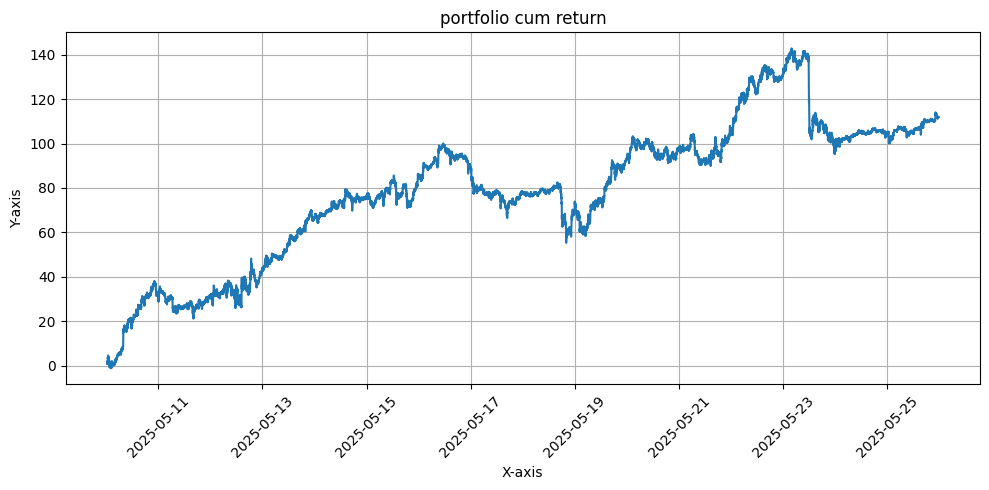

✅ Best model saved.

🔁 Epoch 2/50


Training:   0%|          | 1/3329 [00:00<29:49,  1.86it/s]

  Step 0/3329 - Batch Loss: -0.0837 - Avg Loss: -0.0837


Training:   3%|▎         | 101/3329 [00:52<28:13,  1.91it/s]

  Step 100/3329 - Batch Loss: -0.0783 - Avg Loss: -0.0739


Training:   6%|▌         | 201/3329 [01:44<26:48,  1.95it/s]

  Step 200/3329 - Batch Loss: -0.1279 - Avg Loss: -0.0767


Training:   9%|▉         | 301/3329 [02:35<26:40,  1.89it/s]

  Step 300/3329 - Batch Loss: -0.0729 - Avg Loss: -0.0779


Training:  12%|█▏        | 401/3329 [03:27<25:24,  1.92it/s]

  Step 400/3329 - Batch Loss: -0.1375 - Avg Loss: -0.0785


Training:  15%|█▌        | 501/3329 [04:19<24:20,  1.94it/s]

  Step 500/3329 - Batch Loss: -0.0549 - Avg Loss: -0.0784


Training:  18%|█▊        | 601/3329 [05:09<22:19,  2.04it/s]

  Step 600/3329 - Batch Loss: -0.1036 - Avg Loss: -0.0791


Training:  21%|██        | 701/3329 [05:59<21:38,  2.02it/s]

  Step 700/3329 - Batch Loss: -0.0736 - Avg Loss: -0.0793


Training:  24%|██▍       | 801/3329 [06:48<20:50,  2.02it/s]

  Step 800/3329 - Batch Loss: -0.1334 - Avg Loss: -0.0802


Training:  27%|██▋       | 901/3329 [07:38<19:55,  2.03it/s]

  Step 900/3329 - Batch Loss: -0.1124 - Avg Loss: -0.0800


Training:  30%|███       | 1001/3329 [08:26<18:42,  2.07it/s]

  Step 1000/3329 - Batch Loss: -0.0717 - Avg Loss: -0.0804


Training:  33%|███▎      | 1101/3329 [09:15<17:50,  2.08it/s]

  Step 1100/3329 - Batch Loss: -0.1050 - Avg Loss: -0.0808


Training:  36%|███▌      | 1201/3329 [10:04<17:09,  2.07it/s]

  Step 1200/3329 - Batch Loss: -0.0935 - Avg Loss: -0.0814


Training:  39%|███▉      | 1301/3329 [10:53<16:24,  2.06it/s]

  Step 1300/3329 - Batch Loss: -0.1182 - Avg Loss: -0.0818


Training:  42%|████▏     | 1401/3329 [11:42<15:35,  2.06it/s]

  Step 1400/3329 - Batch Loss: -0.0915 - Avg Loss: -0.0821


Training:  45%|████▌     | 1501/3329 [12:30<14:49,  2.05it/s]

  Step 1500/3329 - Batch Loss: -0.1216 - Avg Loss: -0.0823


Training:  48%|████▊     | 1601/3329 [13:19<13:45,  2.09it/s]

  Step 1600/3329 - Batch Loss: -0.0803 - Avg Loss: -0.0827


Training:  51%|█████     | 1701/3329 [14:07<13:07,  2.07it/s]

  Step 1700/3329 - Batch Loss: -0.1259 - Avg Loss: -0.0830


Training:  54%|█████▍    | 1801/3329 [14:56<12:19,  2.07it/s]

  Step 1800/3329 - Batch Loss: -0.1148 - Avg Loss: -0.0833


Training:  57%|█████▋    | 1901/3329 [15:46<11:45,  2.02it/s]

  Step 1900/3329 - Batch Loss: -0.0512 - Avg Loss: -0.0837


Training:  60%|██████    | 2001/3329 [16:36<11:23,  1.94it/s]

  Step 2000/3329 - Batch Loss: -0.0741 - Avg Loss: -0.0842


Training:  63%|██████▎   | 2101/3329 [17:26<10:21,  1.97it/s]

  Step 2100/3329 - Batch Loss: -0.1330 - Avg Loss: -0.0849


Training:  66%|██████▌   | 2201/3329 [18:16<09:22,  2.01it/s]

  Step 2200/3329 - Batch Loss: -0.0041 - Avg Loss: -0.0854


Training:  69%|██████▉   | 2301/3329 [19:06<08:27,  2.03it/s]

  Step 2300/3329 - Batch Loss: -0.0884 - Avg Loss: -0.0863


Training:  72%|███████▏  | 2401/3329 [19:56<07:34,  2.04it/s]

  Step 2400/3329 - Batch Loss: -0.1097 - Avg Loss: -0.0867


Training:  75%|███████▌  | 2501/3329 [20:46<06:48,  2.03it/s]

  Step 2500/3329 - Batch Loss: -0.0535 - Avg Loss: -0.0873


Training:  78%|███████▊  | 2601/3329 [21:36<05:58,  2.03it/s]

  Step 2600/3329 - Batch Loss: -0.1057 - Avg Loss: -0.0878


Training:  81%|████████  | 2701/3329 [22:26<05:14,  1.99it/s]

  Step 2700/3329 - Batch Loss: -0.0954 - Avg Loss: -0.0882


Training:  84%|████████▍ | 2801/3329 [23:16<04:22,  2.01it/s]

  Step 2800/3329 - Batch Loss: -0.1007 - Avg Loss: -0.0888


Training:  87%|████████▋ | 2901/3329 [24:06<03:30,  2.04it/s]

  Step 2900/3329 - Batch Loss: -0.1183 - Avg Loss: -0.0894


Training:  90%|█████████ | 3001/3329 [24:56<02:46,  1.97it/s]

  Step 3000/3329 - Batch Loss: -0.0435 - Avg Loss: -0.0899


Training:  93%|█████████▎| 3101/3329 [25:46<01:55,  1.97it/s]

  Step 3100/3329 - Batch Loss: -0.0946 - Avg Loss: -0.0905


Training:  96%|█████████▌| 3201/3329 [26:36<01:04,  1.98it/s]

  Step 3200/3329 - Batch Loss: -0.1035 - Avg Loss: -0.0909


Training:  99%|█████████▉| 3301/3329 [27:25<00:13,  2.05it/s]

  Step 3300/3329 - Batch Loss: -0.0993 - Avg Loss: -0.0915


Validating: 100%|██████████| 719/719 [01:17<00:00,  9.23it/s]


📊 Epoch 2 Summary:
  Train Loss: -0.0917
  Val Loss: -0.0101
Mean Return  54.414566 0.052407425 0.3634577 -0.71199465
Sharpe  0.009888462 0.17500016 0.87395483 -0.6961813
Winrate 0.5211696618946086


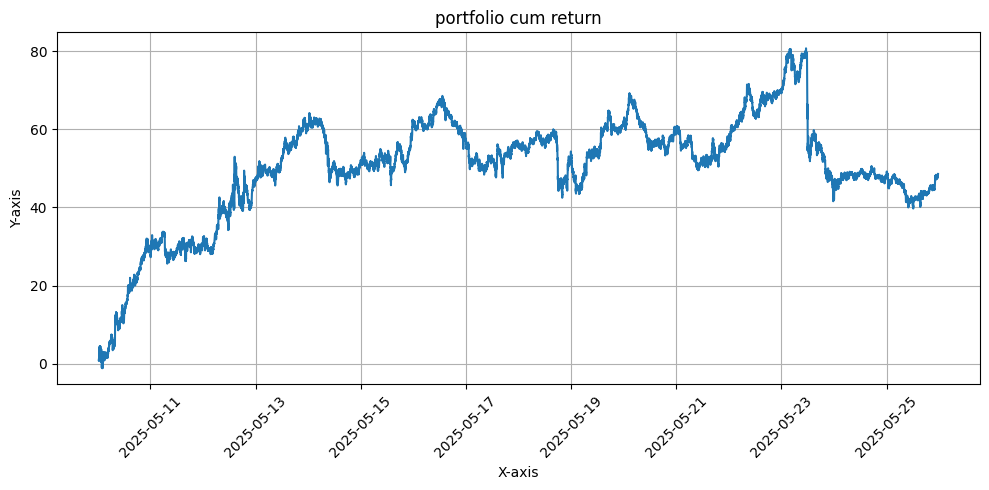

⏳ Early stopping patience: 1/5

🔁 Epoch 3/50


Training:   0%|          | 1/3329 [00:00<27:42,  2.00it/s]

  Step 0/3329 - Batch Loss: -0.1176 - Avg Loss: -0.1176


Training:   2%|▏         | 74/3329 [00:36<27:09,  2.00it/s]

In [ ]:
from sklearn.metrics import r2_score
from tqdm import tqdm
import torch
import numpy as np
import os

def compute_r2_per_stock(y_true, y_pred):
    r2s = []
    for i in range(y_true.shape[1]):
        r2s.append(r2_score(y_true[:, i], y_pred[:, i]))
    return r2s

num_epochs=50
patience=5
save_path='/content/drive/MyDrive/Portfolio/best_model_10of20_v2.pth'
device='cuda'
top_k_stock = 10

best_val_loss = float('inf')
patience_counter = 0
model.to(device)

for epoch in range(1, num_epochs + 1):
    model.train()
    total_train_loss = 0

    print(f"\n🔁 Epoch {epoch}/{num_epochs}")
    for step, batch in enumerate(tqdm(train_loader, desc="Training")):
        ts_input = batch['timeseries'].to(device)
        news_input = batch['news'].to(device)
        target = batch['target'].to(device)
        time_mask = 1 #batch['time_mask'].to(device)

        output = model(ts_input, time_mask, news_input)
        loss = func_loss(output, target, top_k=top_k_stock)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

        # Step-wise print every 100 steps
        if step % 100 == 0:
            avg_loss = total_train_loss / (step + 1)
            print(f"  Step {step}/{len(train_loader)} - Batch Loss: {loss.item():.4f} - Avg Loss: {avg_loss:.4f}")


    # Validation phase
    # Validation phase
    model.eval()
    total_val_loss = 0
    all_preds, all_targets = [], []
    all_return, all_sharp = [], []
    all_topk_vals, all_topk_indices = [], []
    all_time = []
    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Validating"):
            ts_input = batch['timeseries'].to(device)
            news_input = batch['news'].to(device)
            target = batch['target'].to(device)
            time_index = batch['time'].to(device)
            time_mask = 1 #batch['time_mask'].to(device)

            output = model(ts_input, time_mask, news_input)
            loss = func_loss(output, target, top_k=top_k_stock)
            mean_r, sharp = func_validation(output, target, top_k=top_k_stock)
            total_val_loss += loss.item()
            output = torch.tanh(output)
            abs_output = torch.abs(output)
            topk_vals, topk_indices = torch.topk(abs_output, top_k_stock, dim=1)
            all_topk_vals.append(topk_vals.cpu().numpy())
            all_topk_indices.append(topk_indices.cpu().numpy())
            all_preds.append(output.cpu().numpy())
            all_targets.append(target.cpu().numpy())
            all_return.extend(mean_r.cpu().numpy())
            all_sharp.extend(sharp.cpu().numpy())
            all_time.append(time_index.cpu().numpy())

    avg_train_loss = total_train_loss / len(train_loader)
    avg_val_loss = total_val_loss / len(val_loader)

    # y_pred = np.concatenate(all_preds, axis=0)
    # y_true = np.concatenate(all_targets, axis=0)
    # r2_scores = compute_r2_per_stock(y_true, y_pred)

    print(f"📊 Epoch {epoch} Summary:")
    print(f"  Train Loss: {avg_train_loss:.4f}")
    print(f"  Val Loss: {avg_val_loss:.4f}")
    print("Mean Return ", np.sum(all_return), np.std(all_return), np.max(all_return), np.min(all_return))
    print("Sharpe ", np.mean(all_sharp), np.std(all_sharp), np.max(all_sharp), np.min(all_sharp))
    print('Winrate', sum([1 for x in all_return if x>0])/len(all_return))
    # print("  R² per stock:", ["{} , {:.3f}".format(list_crypto_first[r], r2_scores[r]) for r in range(len(r2_scores))])

    func_generate_portfolio(all_preds, all_topk_vals)
    # if epoch % 5 == 0:
    #     np.save(f"y_pred_epoch_{epoch}.npy", y_pred)
    #     np.save(f"y_true_epoch_{epoch}.npy", y_true)

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        torch.save(model.state_dict(), save_path)
        print("✅ Best model saved.")
    else:
        patience_counter += 1
        print(f"⏳ Early stopping patience: {patience_counter}/{patience}")

    if patience_counter >= patience:
        print("⛔ Early stopping triggered.")
        break